In [1]:
using Pkg; Pkg.add("Interact"); Pkg.add("DifferentialEquations"); Pkg.add("Makie")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [=====>                                   ]  12.4 %                           ]  30.3 %Fetching: [================>                        ]  38.2 %                 ]  56.1 %==============================>          ]  74.2 %92.1 %Fetching: [======================================>  ]  94.3 % Resolving package versions...
 Installed ImageFiltering ─ v0.5.2
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [6a3955dd] ↑ ImageFiltering v0.5.1 ⇒ v0.5.2
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/

In [2]:
using Interact
ui = button()
display(ui)

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/0e7482af4de496796c4f3a022ad9d273ca8183b6-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/0e7482af4de496796c4f3a022ad9d273ca8183b6-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:button,Int64}(OrderedDict{Symbol,Any}(), Observable{Int64} with 1 listeners. Value:
0, Scope("knockout-component-51ab1c17-ce9e-4275-aaaa-4227143661b4", Node{WebIO.DOM}(WebIO.DOM(:html, :button), Any["Press me!"], Dict{Symbol,Any}(:attributes=>Dict{Any,Any}("data-bind"=>"click : function () {this.clicks(this.clicks()+1)}"),:className=>"button is-primary",:style=>Dict{String,Any}()), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("clicks"=>(Observable{Int64} with 1 listeners. Value:
0, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/kamil/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"clicks\\\":0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"clicks\"].subscribe((function (val){!(this.valueFromJulia[\"clicks\"]) ? (WebIO.setval({\"name\":\"clicks\",\"scope\":\"knockout-component-51ab1c17-ce9e-4275-aaaa-4227143661b4\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"clicks\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n")]),"clicks"=>Any[JSString("(function (val){return (val!=this.model[\"clicks\"]()) ? (this.valueFromJulia[\"clicks\"]=true, this.model[\"clicks\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:1), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0))), getfield(Base, Symbol("##52#53")){getfield(WebIO, Symbol("#dom#15")){getfield(WebIO, Symbol("##dom#13#14")){Dict{Any,Any},WebIO.DOM}},typeof(scope)}(getfield(WebIO, Symbol("#dom#15")){getfield(WebIO, Symbol("##dom#13#14")){Dict{Any,Any},WebIO.DOM}}(getfield(WebIO, Symbol("##dom#13#14")){Dict{Any,Any},WebIO.DOM}(Dict{Any,Any}(:className=>"field"), WebIO.DOM(:html, :div))), Widgets.scope))

In [12]:
using DataFrames

function two_body_euler(r::Array, v::Array, dt::Real)
    df = DataFrame(x = Float64[], y = Float64[], z = Float64[])
    for t = 0:dt:10
        r2 = sum(r.^2)
        a = -r./(sqrt(r2) * r2)
        r += v.*dt
        v += a.*dt
        push!(df, r)
    end
    df
end

two_body_euler (generic function with 1 method)

In [13]:
two_body_euler([1,0,0], [0,0.5,0.1], 0.01)

,x,y,z
,Float64,Float64,Float64
1,1.0,0.005,0.001
2,0.9999,0.01,0.002
3,0.9997,0.0149995,0.0029999
4,0.9994,0.019998,0.0039996
5,0.999,0.024995,0.004999
6,0.9985,0.02999,0.005998
7,0.9979,0.0349825,0.0069965
8,0.997199,0.039972,0.00799439
9,0.996399,0.0449579,0.00899159


In [14]:
function two_body_euler_absolute(r::Array, v::Array, dt::Real)
    df = two_body_euler(r, v, dt)
    dist = sum(r.^2)
    df[:x1] = map((x) -> -1/2*x*dist, df[:x])
    df[:y1] = map((x) -> -1/2*x*dist, df[:y])
    df[:z1] = map((x) -> -1/2*x*dist, df[:z])
    df[:x2] = map((x) -> 1/2*x*dist, df[:x])
    df[:y2] = map((x) -> 1/2*x*dist, df[:y])
    df[:z2] = map((x) -> 1/2*x*dist, df[:z])
    df
end

two_body_euler_absolute (generic function with 1 method)

In [15]:
two_body_euler_absolute([1,0,0], [0,0.5,0.1], 0.01)

,x,y,z,x1,y1,z1,x2,y2,z2
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.005,0.001,-0.5,-0.0025,-0.0005,0.5,0.0025,0.0005
2,0.9999,0.01,0.002,-0.49995,-0.005,-0.001,0.49995,0.005,0.001
3,0.9997,0.0149995,0.0029999,-0.49985,-0.00749975,-0.00149995,0.49985,0.00749975,0.00149995
4,0.9994,0.019998,0.0039996,-0.4997,-0.009999,-0.0019998,0.4997,0.009999,0.0019998
5,0.999,0.024995,0.004999,-0.4995,-0.0124975,-0.0024995,0.4995,0.0124975,0.0024995
6,0.9985,0.02999,0.005998,-0.49925,-0.014995,-0.002999,0.49925,0.014995,0.002999
7,0.9979,0.0349825,0.0069965,-0.49895,-0.0174912,-0.00349825,0.49895,0.0174912,0.00349825
8,0.997199,0.039972,0.00799439,-0.4986,-0.019986,-0.0039972,0.4986,0.019986,0.0039972
9,0.996399,0.0449579,0.00899159,-0.498199,-0.022479,-0.00449579,0.498199,0.022479,0.00449579


Widget{:default,Any}(OrderedDict{Symbol,Any}(:dt=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
5,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["1.0e-5", "2.0e-5", "3.0e-5", "4.0e-5", "5.0e-5", "6.0e-5", "7.0e-5", "8.0e-5", "9.0e-5", "0.0001"],:formatted_value=>Observable{String} with 1 listeners. Value:
"5.0e-5",:value=>Observable{Float64} with 2 listeners. Value:
5.0e-5), Observable{Float64} with 2 listeners. Value:
5.0e-5, Scope("knockout-component-48344c9a-6821-4f20-b75c-41016ff279cb", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["dt"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["1.0e-5", "2.0e-5", "3.0e-5", "4.0e-5", "5.0e-5", "6.0e-5", "7.0e-5", "8.0e-5", "9.0e-5", "0.0001"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"5.0e-5", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/kamil/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"1.0e-5\\\",\\\"2.0e-5\\\",\\\"3.0e-5\\\",\\\"4.0e-5\\\",\\\"5.0e-5\\\",\\\"6.0e-5\\\",\\\"7.0e-5\\\",\\\"8.0e-5\\\",\\\"9.0e-5\\\",\\\"0.0001\\\"],\\\"changes\\\
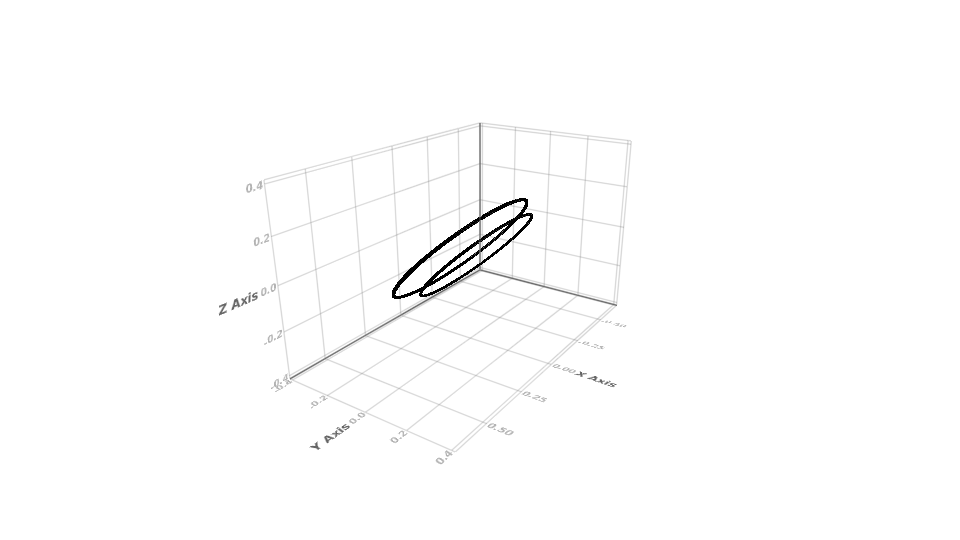
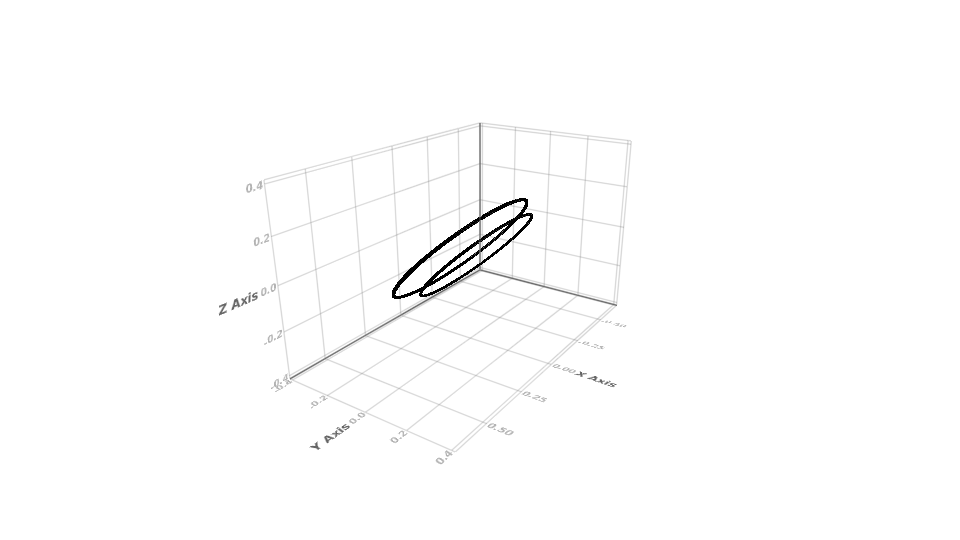

In [16]:
using Interact
using Makie
function two_body_euler_interactive()
    dt = Interact.slider(0.00001:0.00001:0.0001, label = "dt")
    vx = spinbox(label = "vx", value = 0.5)
    vy = spinbox(label = "vy", value = 0.5)
    vz = spinbox(label = "vz", value = 0.5)
    df = Interact.@map two_body_euler_absolute([1,0,0], [&vx, &vy, &vz], &dt)
    plt = Interact.@map Makie.scatter(vcat((&df)[:x1],(&df)[:x2]),
        vcat((&df)[:y1],(&df)[:y2]), 
        vcat((&df)[:z1],(&df)[:z2]),
        markersize = 0.01)
    
    wdg = Widget(["dt" => dt, "vx" => vx, "vy" => vy, "vz" => vz], output = df)
    @layout! wdg hbox(plt, vbox(:dt, hbox(:vx, :vy, :vz))) 
end
two_body_euler_interactive()

Widget{:default,Any}(OrderedDict{Symbol,Any}(:dt=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
5,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["1.0e-5", "2.0e-5", "3.0e-5", "4.0e-5", "5.0e-5", "6.0e-5", "7.0e-5", "8.0e-5", "9.0e-5", "0.0001"],:formatted_value=>Observable{String} with 1 listeners. Value:
"5.0e-5",:value=>Observable{Float64} with 2 listeners. Value:
5.0e-5), Observable{Float64} with 2 listeners. Value:
5.0e-5, Scope("knockout-component-1d87db3a-2e4d-4bba-9510-d7704b82ed13", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["dt"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["1.0e-5", "2.0e-5", "3.0e-5", "4.0e-5", "5.0e-5", "6.0e-5", "7.0e-5", "8.0e-5", "9.0e-5", "0.0001"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"5.0e-5", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/kamil/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"1.0e-5\\\",\\\"2.0e-5\\\",\\\"3.0e-5\\\",\\\"4.0e-5\\\",\\\"5.0e-5\\\",\\\"6.0e-5\\\",\\\"7.0e-5\\\",\\\"8.0e-5\\\",\\\"9.0e-5\\\",\\\"0.0001\\\"],\\\"changes\\\
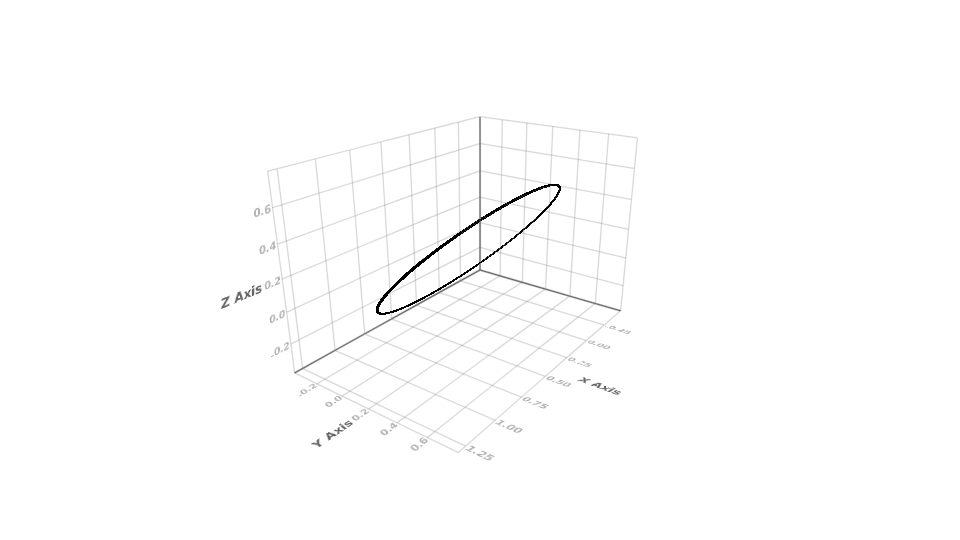
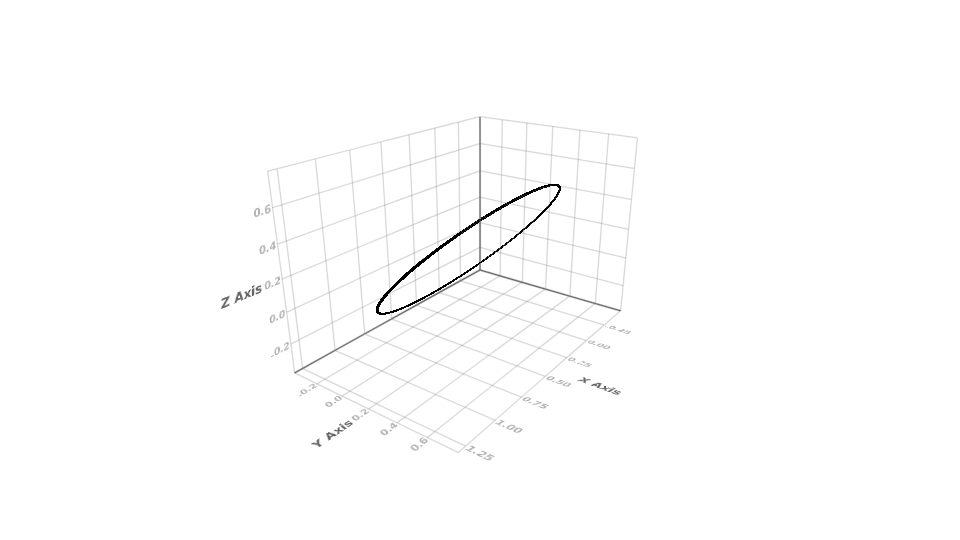

In [17]:
using Interact
using Makie
function two_body_euler_interactive()
    dt = Interact.slider(0.00001:0.00001:0.0001, label = "dt")
    vx = spinbox(label = "vx", value = 0.5)
    vy = spinbox(label = "vy", value = 0.5)
    vz = spinbox(label = "vz", value = 0.5)
    df = Interact.@map two_body_euler([1,0,0], [&vx, &vy, &vz], &dt)
    plt = Interact.@map Makie.scatter((&df)[:x], (&df)[:y], (&df)[:z],
        markersize = 0.01)
    wdg = Widget(["dt" => dt, "vx" => vx, "vy" => vy, "vz" => vz], output = df)
    @layout! wdg hbox(plt, vbox(:dt, hbox(:vx, :vy, :vz))) 
end
two_body_euler_interactive()

In [18]:
using DifferentialEquations
function two_body(x::Array, v::Array, dt::Float64)
    u0 = vcat(x,v)
    twobody = (du,u,p,t) -> begin
        r = u[1:3]
        r2 = sum(r.^2)
        a = -r./(sqrt(r2) * r2)
      
        du[1:3] = u[4:6]
        du[4:6] = a
    end
    tspan = (0.0,100.0)
    prob = ODEProblem(twobody,u0,tspan)
    solve(prob,Tsit5(),dt = dt)
end

two_body (generic function with 1 method)

Widget{:default,Any}(OrderedDict{Symbol,Any}(:dt=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
50,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["1.0e-7", "2.0e-7", "3.0e-7", "4.0e-7", "5.0e-7", "6.0e-7", "7.0e-7", "8.0e-7", "9.0e-7", "1.0e-6"  …  "9.1e-6", "9.2e-6", "9.3e-6", "9.4e-6", "9.5e-6", "9.6e-6", "9.7e-6", "9.8e-6", "9.9e-6", "1.0e-5"],:formatted_value=>Observable{String} with 1 listeners. Value:
"5.0e-6",:value=>Observable{Float64} with 2 listeners. Value:
5.0e-6), Observable{Float64} with 2 listeners. Value:
5.0e-6, Scope("knockout-component-6f9880d7-a995-4690-90bd-e941fc7d075c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["dt"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["1.0e-7", "2.0e-7", "3.0e-7", "4.0e-7", "5.0e-7", "6.0e-7", "7.0e-7", "8.0e-7", "9.0e-7", "1.0e-6"  …  "9.1e-6", "9.2e-6", "9.3e-6", "9.4e-6", "9.5e-6", "9.6e-6", "9.7e-6", "9.8e-6", "9.9e-6", "1.0e-5"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"5.0e-6", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/kamil/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_d
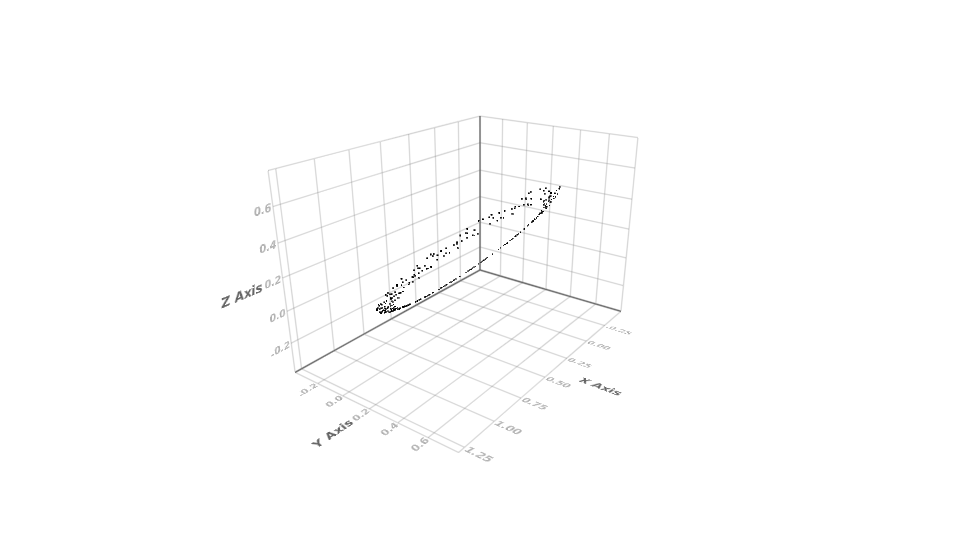
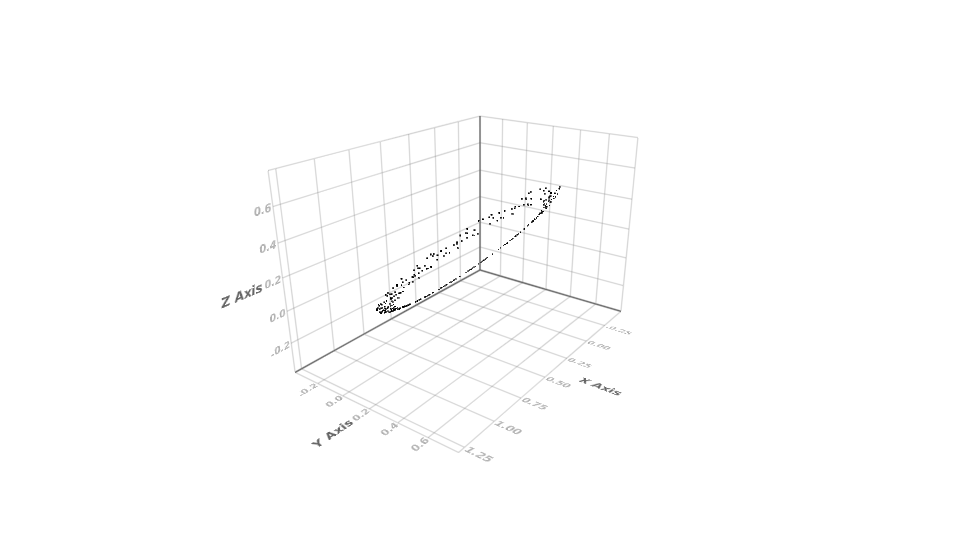

In [19]:
function two_body_interactive()
    dt = Interact.slider(0.0000001:0.0000001:0.00001, label = "dt")
    vx = spinbox(label = "vx", value = 0.5)
    vy = spinbox(label = "vy", value = 0.5)
    vz = spinbox(label = "vz", value = 0.5)
    df = Interact.@map two_body([1,0,0], [&vx, &vy, &vz], &dt)
    plt = Interact.@map Makie.scatter((&df)[1,:], (&df)[2,:], (&df)[3,:],
        markersize = 0.01)
    wdg = Widget(["dt" => dt, "vx" => vx, "vy" => vy, "vz" => vz], output = df)
    @layout! wdg hbox(plt, vbox(:dt, hbox(:vx, :vy, :vz))) 
end
two_body_interactive()

In [20]:
function two_body_tol(x::Array, v::Array, t::Float64)
    u0 = vcat(x,v)
    twobody = (du,u,p,t) -> begin
        r = u[1:3]
        r2 = sum(r.^2)
        a = -r./(sqrt(r2) * r2)
      
        du[1:3] = u[4:6]
        du[4:6] = a
    end
    tspan = (0.0,100.0)
    prob = ODEProblem(twobody,u0,tspan)
    solve(prob, reltol = t)
end

two_body_tol (generic function with 1 method)

Widget{:default,Any}(OrderedDict{Symbol,Any}(:dt=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
50,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["1.0e-7", "1.01e-5", "2.01e-5", "3.01e-5", "4.01e-5", "5.01e-5", "6.01e-5", "7.01e-5", "8.01e-5", "9.01e-5"  …  "0.0009001", "0.0009101", "0.0009201", "0.0009301", "0.0009401", "0.0009501", "0.0009601", "0.0009701", "0.0009801", "0.0009901"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.0004901",:value=>Observable{Float64} with 2 listeners. Value:
0.0004901), Observable{Float64} with 2 listeners. Value:
0.0004901, Scope("knockout-component-5122b7f9-f227-444d-856e-46299ece970e", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["tolerance"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["1.0e-7", "1.01e-5", "2.01e-5", "3.01e-5", "4.01e-5", "5.01e-5", "6.01e-5", "7.01e-5", "8.01e-5", "9.01e-5"  …  "0.0009001", "0.0009101", "0.0009201", "0.0009301", "0.0009401", "0.0009501", "0.0009601", "0.0009701", "0.0009801", "0.0009901"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.0004901", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/kamil/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/kamil/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/kamil/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: string
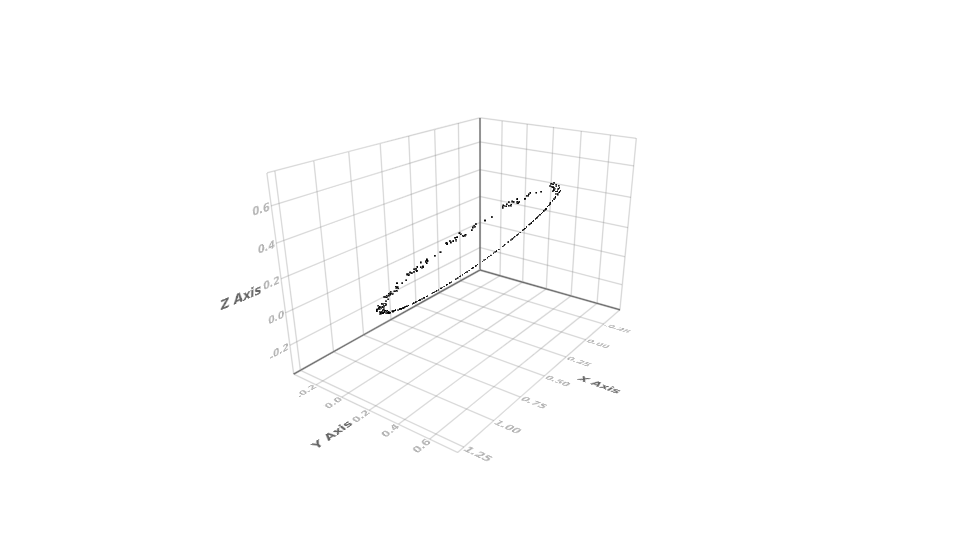
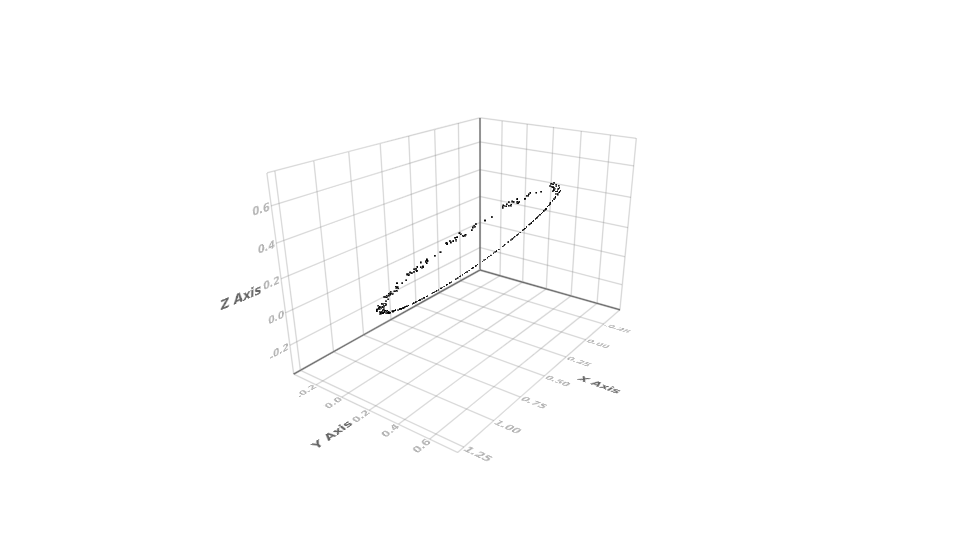

In [21]:
function two_body_interactive_tol()
    dt = Interact.slider(0.0000001:0.00001:0.001, label = "tolerance")
    vx = spinbox(label = "vx", value = 0.5)
    vy = spinbox(label = "vy", value = 0.5)
    vz = spinbox(label = "vz", value = 0.5)
    df = Interact.@map two_body_tol([1,0,0], [&vx, &vy, &vz], &dt)
    plt = Interact.@map Makie.scatter((&df)[1,:], (&df)[2,:], (&df)[3,:],
        markersize = 0.01)
    wdg = Widget(["dt" => dt, "vx" => vx, "vy" => vy, "vz" => vz], output = df)
    @layout! wdg hbox(plt, vbox(:dt, hbox(:vx, :vy, :vz))) 
end
two_body_interactive_tol()